# Import Required Libraries

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling later
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the CSV Files

In [2]:
# Step 2: Load CSV Files
data_path = r'C:\Users\Hp\Desktop\open ended lab'

building_df = pd.read_csv(os.path.join(data_path, 'Building_2.csv'))
carbon_df = pd.read_csv(os.path.join(data_path, 'carbon_intensity.csv'))
pricing_df = pd.read_csv(os.path.join(data_path, 'pricing.csv'))
weather_df = pd.read_csv(os.path.join(data_path, 'weather.csv'))

# Display shapes to confirm successful loading
print("Building Data Shape: ", building_df.shape)
print("Carbon Intensity Shape: ", carbon_df.shape)
print("Pricing Data Shape: ", pricing_df.shape)
print("Weather Data Shape: ", weather_df.shape)


Building Data Shape:  (8760, 12)
Carbon Intensity Shape:  (8760, 1)
Pricing Data Shape:  (8760, 4)
Weather Data Shape:  (8760, 16)


In [3]:
building_df.head()


,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation
0,7,24,7,0,NaN,NaN,NaN,2.188750,0.0,0.0,0.0,0.0
1,8,1,1,0,NaN,NaN,NaN,1.370667,0.0,0.0,0.0,0.0
2,8,2,1,0,NaN,NaN,NaN,1.101250,0.0,0.0,0.0,0.0
3,8,3,1,0,NaN,NaN,NaN,0.543217,0.0,0.0,0.0,0.0
4,8,4,1,0,NaN,NaN,NaN,0.542833,0.0,0.0,0.0,0.0


# Convert Index to DateTime & Merge All Datasets

In [4]:
# Step 3: Create DateTime Index and Merge Datasets

# Generate datetime index (assuming data starts from Jan 1st, 2018, hourly)
date_range = pd.date_range(start='2018-01-01', periods=8760, freq='H')

# Add datetime index to each DataFrame
building_df['datetime'] = date_range
carbon_df['datetime'] = date_range
pricing_df['datetime'] = date_range
weather_df['datetime'] = date_range

# Merge all DataFrames on 'datetime'
merged_df = building_df.merge(carbon_df, on='datetime') \
                       .merge(pricing_df, on='datetime') \
                       .merge(weather_df, on='datetime')

# Set datetime as index
merged_df.set_index('datetime', inplace=True)

# Display merged shape and head
print("✅ Merged DataFrame Shape:", merged_df.shape)
merged_df.head()


✅ Merged DataFrame Shape: (8760, 33)


,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,7,24,7,0,NaN,NaN,NaN,2.188750,0.0,0.0,...,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
2018-01-01 01:00:00,8,1,1,0,NaN,NaN,NaN,1.370667,0.0,0.0,...,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2018-01-01 02:00:00,8,2,1,0,NaN,NaN,NaN,1.101250,0.0,0.0,...,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
2018-01-01 03:00:00,8,3,1,0,NaN,NaN,NaN,0.543217,0.0,0.0,...,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
2018-01-01 04:00:00,8,4,1,0,NaN,NaN,NaN,0.542833,0.0,0.0,...,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


# Check & Handle Missing Values

In [5]:
# Step 4: Check Missing Values

# Count missing values in each column
missing_counts = merged_df.isnull().sum()
print("🕵️ Missing Values Per Column:\n")
print(missing_counts)

# Optionally, you can also check the percentage of missing data
missing_percent = (missing_counts / len(merged_df)) * 100
print("\n📉 Missing Value Percentage:\n")
print(missing_percent)


🕵️ Missing Values Per Column:

month                                           0
hour                                            0
day_type                                        0
daylight_savings_status                         0
indoor_dry_bulb_temperature                  8760
average_unmet_cooling_setpoint_difference    8760
indoor_relative_humidity                     8760
non_shiftable_load                              0
dhw_demand                                      0
cooling_demand                                  0
heating_demand                                  0
solar_generation                                0
carbon_intensity                                0
electricity_pricing                             0
electricity_pricing_predicted_1                 0
electricity_pricing_predicted_2                 0
electricity_pricing_predicted_3                 0
outdoor_dry_bulb_temperature                    0
outdoor_relative_humidity                       0
diffuse_solar_irrad

# Drop Columns with 100% Missing Values

In [6]:
# Step 5: Drop columns with 100% missing values

columns_to_drop = ['indoor_dry_bulb_temperature',
                   'average_unmet_cooling_setpoint_difference',
                   'indoor_relative_humidity']

merged_df.drop(columns=columns_to_drop, inplace=True)

# Confirm the drop
print("✅ Remaining Columns:", merged_df.columns.tolist())
print("✅ New Shape:", merged_df.shape)


✅ Remaining Columns: ['month', 'hour', 'day_type', 'daylight_savings_status', 'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand', 'solar_generation', 'carbon_intensity', 'electricity_pricing', 'electricity_pricing_predicted_1', 'electricity_pricing_predicted_2', 'electricity_pricing_predicted_3', 'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 'outdoor_dry_bulb_temperature_predicted_1', 'outdoor_dry_bulb_temperature_predicted_2', 'outdoor_dry_bulb_temperature_predicted_3', 'outdoor_relative_humidity_predicted_1', 'outdoor_relative_humidity_predicted_2', 'outdoor_relative_humidity_predicted_3', 'diffuse_solar_irradiance_predicted_1', 'diffuse_solar_irradiance_predicted_2', 'diffuse_solar_irradiance_predicted_3', 'direct_solar_irradiance_predicted_1', 'direct_solar_irradiance_predicted_2', 'direct_solar_irradiance_predicted_3']
✅ New Shape: (8760, 30)


# Outlier Detection & Removal

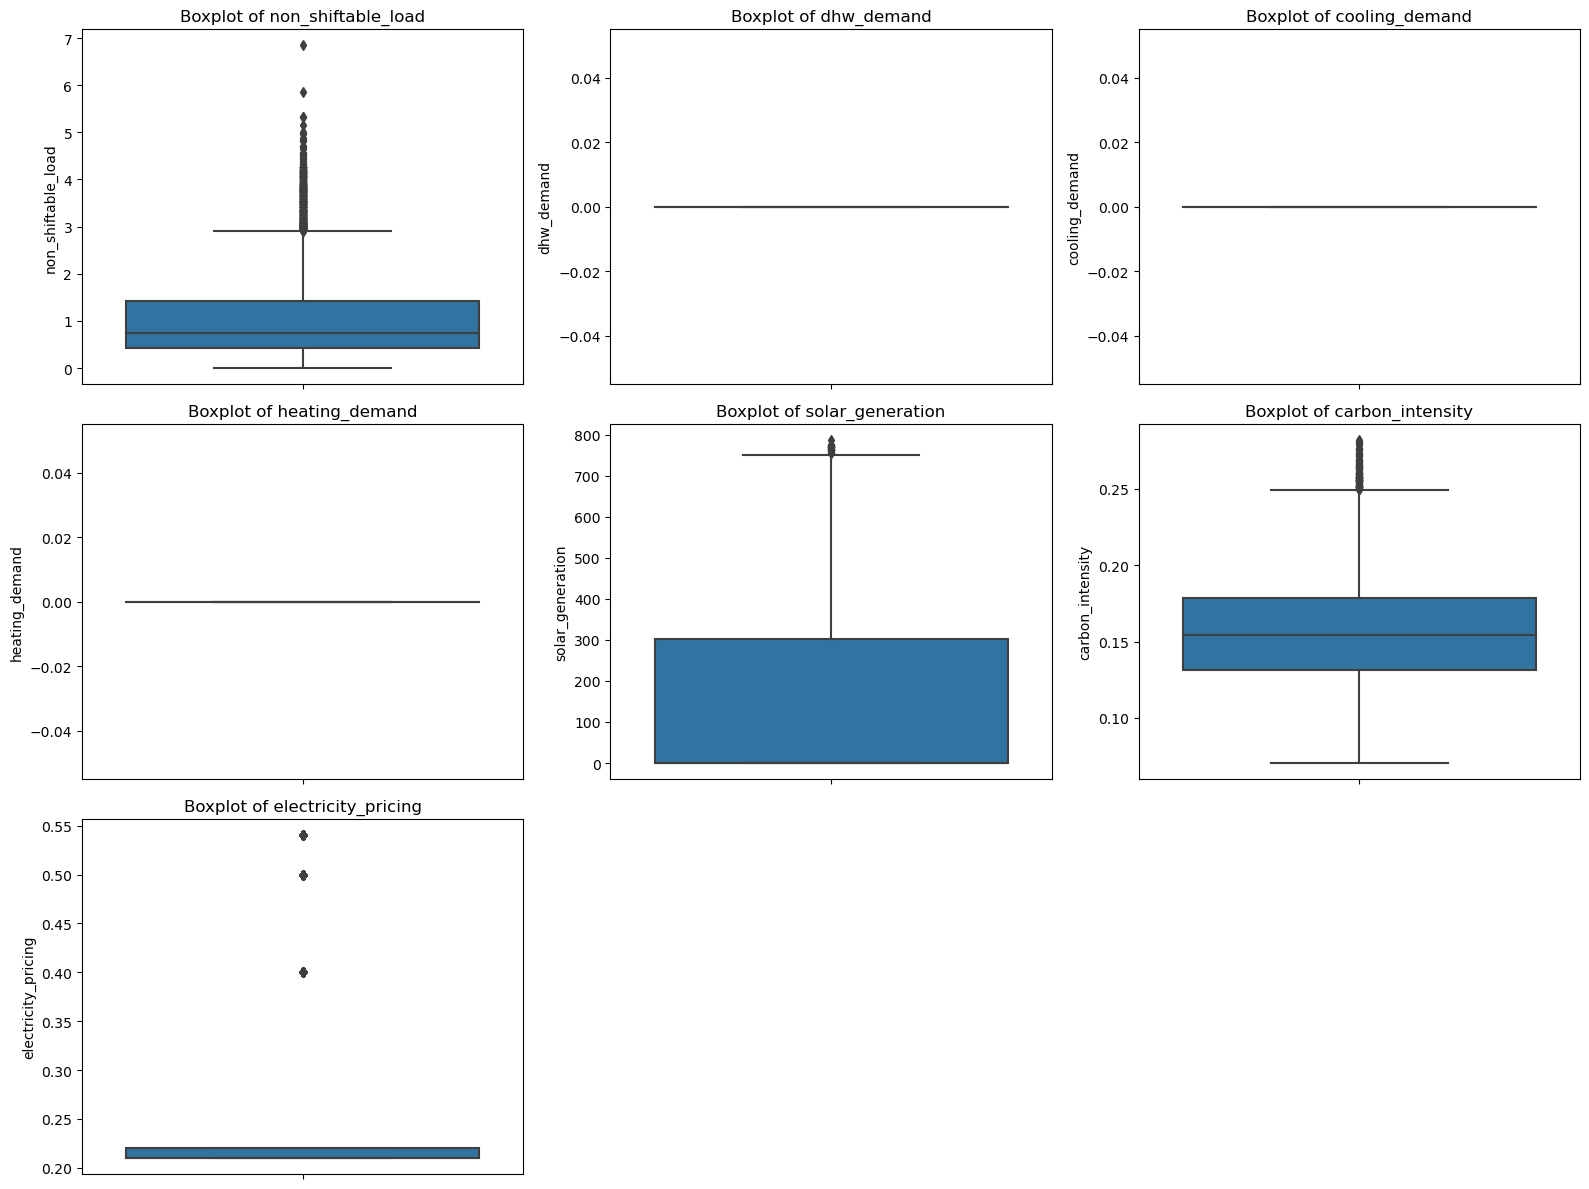

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6a: Boxplot of selected numeric columns
numeric_cols = ['non_shiftable_load', 'dhw_demand', 'cooling_demand', 
                'heating_demand', 'solar_generation', 'carbon_intensity', 
                'electricity_pricing']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=merged_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Save Merged Cleaned Dataset

In [11]:
# Define the output path to save the cleaned merged file
output_path = r'C:\Users\Hp\Desktop\open ended lab\merged_cleaned.csv'

# Save the cleaned merged DataFrame to CSV
merged_df.to_csv(output_path, index=False)

print(f"✅ Cleaned merged dataset saved at:\n{output_path}")


✅ Cleaned merged dataset saved at:
C:\Users\Hp\Desktop\open ended lab\merged_cleaned.csv


# Correlation Analysis 

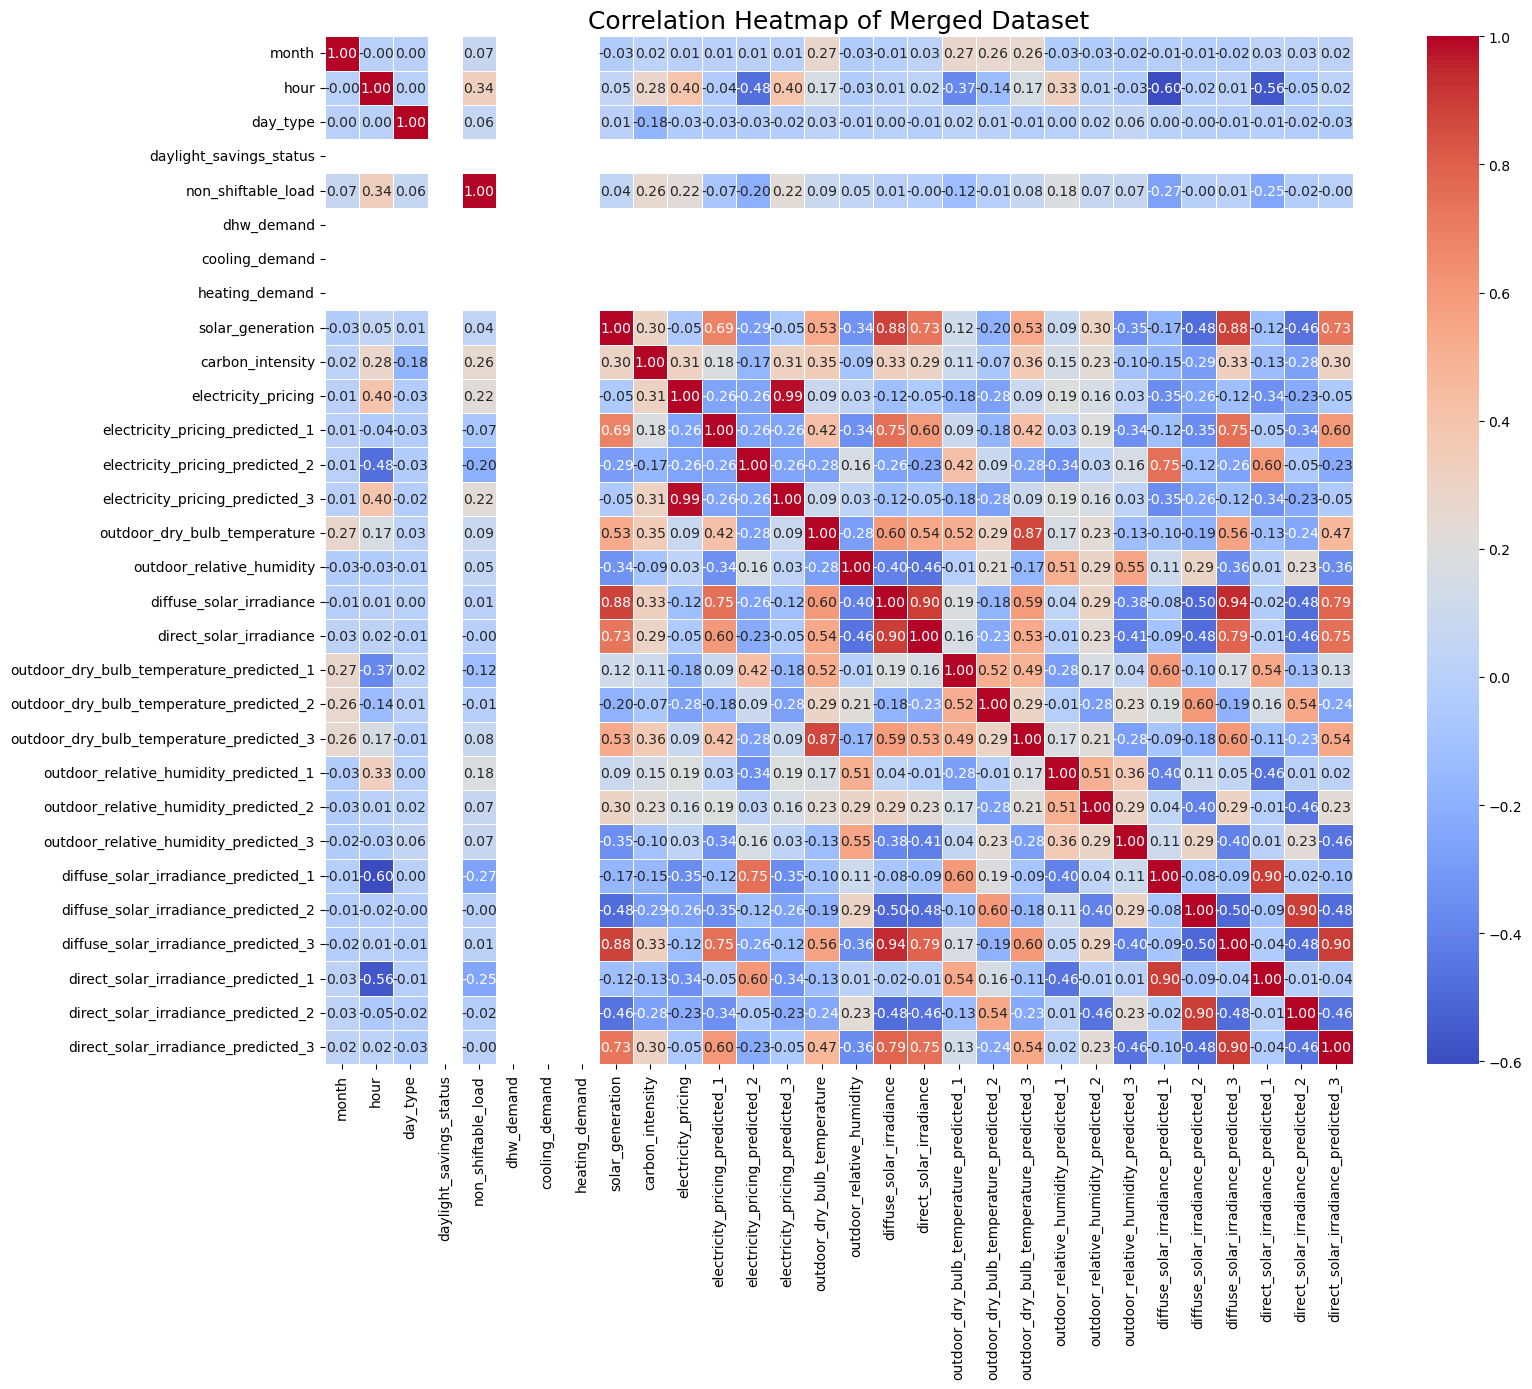

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(18, 14))

# Compute correlation matrix
corr_matrix = merged_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Merged Dataset", fontsize=18)
plt.tight_layout()
plt.show()


# Feature Selection & Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Set target column
target_column = 'non_shiftable_load'

# Select all other columns as features (except target)
feature_columns = [col for col in merged_df.columns if col != target_column]

# Extract features and target
X = merged_df[feature_columns].values
y = merged_df[[target_column]].values


In [14]:
# Initialize scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit and transform
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)


# Train, Validation, and Test Split (Time Series Aware)

In [15]:
# Calculate split indices
total_samples = len(X_scaled)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.15)
test_size = total_samples - train_size - val_size

# Split the data
X_train = X_scaled[:train_size]
y_train = y_scaled[:train_size]

X_val = X_scaled[train_size:train_size+val_size]
y_val = y_scaled[train_size:train_size+val_size]

X_test = X_scaled[train_size+val_size:]
y_test = y_scaled[train_size+val_size:]

print("✅ Split Sizes:")
print("Training Set: ", X_train.shape)
print("Validation Set: ", X_val.shape)
print("Test Set: ", X_test.shape)


✅ Split Sizes:
Training Set:  (6132, 29)
Validation Set:  (1314, 29)
Test Set:  (1314, 29)


In [12]:
import pandas as pd

# Load the cleaned CSV
csv_path = r"C:\Users\Hp\Desktop\open ended lab\merged_cleaned.csv"
merged_clean_df = pd.read_csv(csv_path)

# Check shape and a few rows
print("Loaded shape:", merged_clean_df.shape)
merged_clean_df.head()


Loaded shape: (8760, 30)


,month,hour,day_type,daylight_savings_status,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,carbon_intensity,...,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3
0,7,24,7,0,2.188750,0.0,0.0,0.0,0.0,0.170724,...,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,8,1,1,0,1.370667,0.0,0.0,0.0,0.0,0.157319,...,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,8,2,1,0,1.101250,0.0,0.0,0.0,0.0,0.154503,...,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,8,3,1,0,0.543217,0.0,0.0,0.0,0.0,0.150945,...,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,8,4,1,0,0.542833,0.0,0.0,0.0,0.0,0.151820,...,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


# Create Time-Based Splits

In [9]:
df_merged_clean = pd.read_csv(r"C:\Users\Hp\Desktop\open ended lab\merged_cleaned.csv")


In [11]:
# Define split ratios
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

# Use the correct DataFrame
n = len(df_merged_clean)

# Index boundaries
train_end = int(n * train_ratio)
val_end = train_end + int(n * val_ratio)

# Split the data
train_df = df_merged_clean.iloc[:train_end]
val_df = df_merged_clean.iloc[train_end:val_end]
test_df = df_merged_clean.iloc[val_end:]

# Print shapes
print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")


Train shape: (6132, 30)
Validation shape: (1314, 30)
Test shape: (1314, 30)


# Save the Split Files to Directory

In [12]:
train_df.to_csv(r"C:\Users\Hp\Desktop\open ended lab\train.csv", index=False)
val_df.to_csv(r"C:\Users\Hp\Desktop\open ended lab\val.csv", index=False)
test_df.to_csv(r"C:\Users\Hp\Desktop\open ended lab\test.csv", index=False)


# Feature Scaling (MinMaxScaler) + Save Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
import joblib  # for saving scaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit only on training data
scaler.fit(train_df)

# Transform all sets
X_train_scaled = scaler.transform(train_df)
X_val_scaled = scaler.transform(val_df)
X_test_scaled = scaler.transform(test_df)

# Convert back to DataFrames (optional but useful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_df.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=val_df.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_df.columns)

# Save the scaler
joblib.dump(scaler, r"C:\Users\Hp\Desktop\open ended lab\minmax_scaler.pkl")


['C:\\Users\\Hp\\Desktop\\open ended lab\\minmax_scaler.pkl']

# Create LSTM Input Sequences

In [14]:
def create_sequences(X, y, time_steps=24, forecast_horizon=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - forecast_horizon + 1):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps + forecast_horizon - 1].values)
    return np.array(Xs), np.array(ys)


# Choose Target Variable

In [15]:
TARGET_COLUMN = 'cooling_demand'

# Split target from features
y_train = X_train_scaled[[TARGET_COLUMN]]
y_val = X_val_scaled[[TARGET_COLUMN]]
y_test = X_test_scaled[[TARGET_COLUMN]]

X_train_feat = X_train_scaled.drop(columns=[TARGET_COLUMN])
X_val_feat = X_val_scaled.drop(columns=[TARGET_COLUMN])
X_test_feat = X_test_scaled.drop(columns=[TARGET_COLUMN])


# Generate Sequences

In [16]:
TIME_STEPS = 24  # use past 24 hours
FORECAST_HORIZON = 1  # predict 1 hour ahead

X_train_seq, y_train_seq = create_sequences(X_train_feat, y_train, TIME_STEPS, FORECAST_HORIZON)
X_val_seq, y_val_seq = create_sequences(X_val_feat, y_val, TIME_STEPS, FORECAST_HORIZON)
X_test_seq, y_test_seq = create_sequences(X_test_feat, y_test, TIME_STEPS, FORECAST_HORIZON)

print("Train shape:", X_train_seq.shape, y_train_seq.shape)
print("Validation shape:", X_val_seq.shape, y_val_seq.shape)
print("Test shape:", X_test_seq.shape, y_test_seq.shape)


Train shape: (6108, 24, 29) (6108, 1)
Validation shape: (1290, 24, 29) (1290, 1)
Test shape: (1290, 24, 29) (1290, 1)


# Build and Train the LSTM Model

# Import Libraries

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import os


# Define and Compile the Model

In [18]:
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(TIME_STEPS, X_train_seq.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # single output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                24064     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 26,177
Trainable params: 26,177
Non-trainable params: 0
_________________________________________________________________


# Setup Checkpointing

In [19]:
checkpoint_path = r"C:\Users\Hp\Desktop\open ended lab\checkpoints\best_model.h5"

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)


# Train the Model full code

In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# ======================
# SETUP & CONFIGURATION
# ======================
MAIN_DIR = r'C:\Users\Hp\Desktop\open ended lab\New folder'
os.makedirs(MAIN_DIR, exist_ok=True)

# Configuration
config = {
    'time_steps': 24,        # Lookback window
    'target_col': 0,         # First column is target
    'batch_size': 32,
    'epochs': 50,           # Will now complete all 50 epochs
    'patience': 10,          # Increased patience
    'lstm_units': [64, 32],  # LSTM layer sizes
    'dense_units': 16,       # Dense layer size
    'learning_rate': 0.001,
    'min_lr': 0.00001       # Minimum learning rate
}

# ==================
# DATA PREPARATION
# ==================
def load_and_prepare_data():
    # Load CSVs
    train = pd.read_csv(os.path.join(MAIN_DIR, 'train.csv'))
    val = pd.read_csv(os.path.join(MAIN_DIR, 'val.csv'))
    test = pd.read_csv(os.path.join(MAIN_DIR, 'test.csv'))
    
    # Initialize scaler
    scaler = MinMaxScaler()
    
    # Fit on training data
    train_set = scaler.fit_transform(train.values)
    val_set = scaler.transform(val.values)
    test_set = scaler.transform(test.values)
    
    # Save scaler
    with open(os.path.join(MAIN_DIR, 'scaler.pkl'), 'wb') as f:
        pickle.dump(scaler, f)
    
    return train_set, val_set, test_set, scaler

# ==================
# MODEL ARCHITECTURE
# ==================
def create_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(config['lstm_units'][0], 
             return_sequences=True, 
             kernel_initializer='glorot_uniform',
             recurrent_dropout=0.1)(inputs)
    x = LSTM(config['lstm_units'][1], 
             kernel_initializer='glorot_uniform',
             recurrent_dropout=0.1)(x)
    x = Dense(config['dense_units'], activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# ==============
# DATA PIPELINE
# ==============
def create_sequences(data, time_steps, target_col):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps, target_col])
    return np.array(X), np.array(y)

# =============
# MAIN PROCESS
# =============
def main():
    # 1. Prepare data
    train_set, val_set, test_set, scaler = load_and_prepare_data()
    
    # 2. Create sequences
    train_X, train_y = create_sequences(train_set, config['time_steps'], config['target_col'])
    val_X, val_y = create_sequences(val_set, config['time_steps'], config['target_col'])
    test_X, test_y = create_sequences(test_set, config['time_steps'], config['target_col'])
    
    # 3. Build model
    model = create_lstm_model((config['time_steps'], train_X.shape[2]))
    model.compile(optimizer=Adam(learning_rate=config['learning_rate']), 
                  loss='mae',
                  metrics=['mae', 'mse'])
    
    # 4. Callbacks
    callbacks = [
        ModelCheckpoint(os.path.join(MAIN_DIR, 'best_model.h5'), 
                       save_best_only=True,
                       monitor='val_loss'),
        EarlyStopping(patience=config['patience'], 
                     monitor='val_loss',
                     restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss',
                         factor=0.5,
                         patience=5,
                         min_lr=config['min_lr'])
    ]
    
    # 5. Train model (will now complete all 50 epochs)
    print("\nStarting training for 50 epochs...")
    history = model.fit(train_X, train_y,
                        batch_size=config['batch_size'],
                        epochs=config['epochs'],
                        validation_data=(val_X, val_y),
                        callbacks=callbacks,
                        verbose=1)
    
    # 6. Evaluate
    best_model = load_model(os.path.join(MAIN_DIR, 'best_model.h5'))
    y_pred = best_model.predict(test_X)
    
    # Inverse transform predictions
    def inverse_transform(scaler, data, target_col):
        dummy = np.zeros(shape=(len(data), train_set.shape[1]))
        dummy[:, target_col] = data.flatten()
        dummy = scaler.inverse_transform(dummy)
        return dummy[:, target_col]
    
    y_pred_unscaled = inverse_transform(scaler, y_pred, config['target_col'])
    y_test_unscaled = inverse_transform(scaler, test_y, config['target_col'])
    
    # 7. Calculate all metrics
    def safe_mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-7))) * 100
    
    mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
    mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
    rmse = np.sqrt(mse)
    mape = safe_mape(y_test_unscaled, y_pred_unscaled)
    mdape = np.median(np.abs((y_test_unscaled - y_pred_unscaled) / np.maximum(np.abs(y_test_unscaled), 1e-7))) * 100
    r2 = r2_score(y_test_unscaled, y_pred_unscaled)
    
    print("\nFinal Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.6f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²) Score: {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Median Absolute Percentage Error (MDAPE): {mdape:.2f}%")
    
    # 8. Save predictions and metrics
    results = pd.DataFrame({
        'Actual': y_test_unscaled,
        'Predicted': y_pred_unscaled
    })
    results.to_csv(os.path.join(MAIN_DIR, 'predictions.csv'), index=False)
    
    metrics = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE', 'MDAPE'],
        'Value': [mae, mse, rmse, r2, mape, mdape]
    })
    metrics.to_csv(os.path.join(MAIN_DIR, 'metrics.csv'), index=False)
    
    print("\nAll outputs saved successfully!")

if __name__ == "__main__":
    main()


Starting training for 50 epochs...
Epoch 1/50
191/191 [==============================] - 21s 57ms/step - loss: 0.0614 - mae: 0.0614 - mse: 0.0172 - val_loss: 0.0266 - val_mae: 0.0266 - val_mse: 9.3851e-04 - lr: 0.0010
Epoch 2/50
191/191 [==============================] - 9s 50ms/step - loss: 0.0179 - mae: 0.0179 - mse: 0.0015 - val_loss: 0.0343 - val_mae: 0.0343 - val_mse: 0.0014 - lr: 0.0010
Epoch 3/50
191/191 [==============================] - 9s 49ms/step - loss: 0.0154 - mae: 0.0154 - mse: 0.0013 - val_loss: 0.0153 - val_mae: 0.0153 - val_mse: 3.7399e-04 - lr: 0.0010
Epoch 4/50
191/191 [==============================] - 9s 49ms/step - loss: 0.0132 - mae: 0.0132 - mse: 0.0011 - val_loss: 0.0131 - val_mae: 0.0131 - val_mse: 2.9132e-04 - lr: 0.0010
Epoch 5/50
191/191 [==============================] - 9s 48ms/step - loss: 0.0128 - mae: 0.0128 - mse: 0.0011 - val_loss: 0.0159 - val_mae: 0.0159 - val_mse: 3.4411e-04 - lr: 0.0010
Epoch 6/50
191/191 [==============================] - 12s

191/191 [==============================] - 10s 52ms/step - loss: 0.0036 - mae: 0.0036 - mse: 5.2841e-04 - val_loss: 0.0038 - val_mae: 0.0038 - val_mse: 5.9514e-05 - lr: 2.5000e-04
Epoch 45/50
191/191 [==============================] - 10s 51ms/step - loss: 0.0034 - mae: 0.0034 - mse: 5.3083e-04 - val_loss: 0.0041 - val_mae: 0.0041 - val_mse: 6.6131e-05 - lr: 2.5000e-04
Epoch 46/50
191/191 [==============================] - 10s 51ms/step - loss: 0.0034 - mae: 0.0034 - mse: 5.2315e-04 - val_loss: 0.0044 - val_mae: 0.0044 - val_mse: 6.5294e-05 - lr: 2.5000e-04
Epoch 47/50
191/191 [==============================] - 9s 48ms/step - loss: 0.0034 - mae: 0.0034 - mse: 5.2179e-04 - val_loss: 0.0041 - val_mae: 0.0041 - val_mse: 6.2795e-05 - lr: 2.5000e-04
Epoch 48/50
191/191 [==============================] - 10s 50ms/step - loss: 0.0036 - mae: 0.0036 - mse: 5.2662e-04 - val_loss: 0.0038 - val_mae: 0.0038 - val_mse: 6.1435e-05 - lr: 2.5000e-04
Epoch 49/50
191/191 [==============================] 

# 📈 Plotting Code Based on Your Existing Codebase

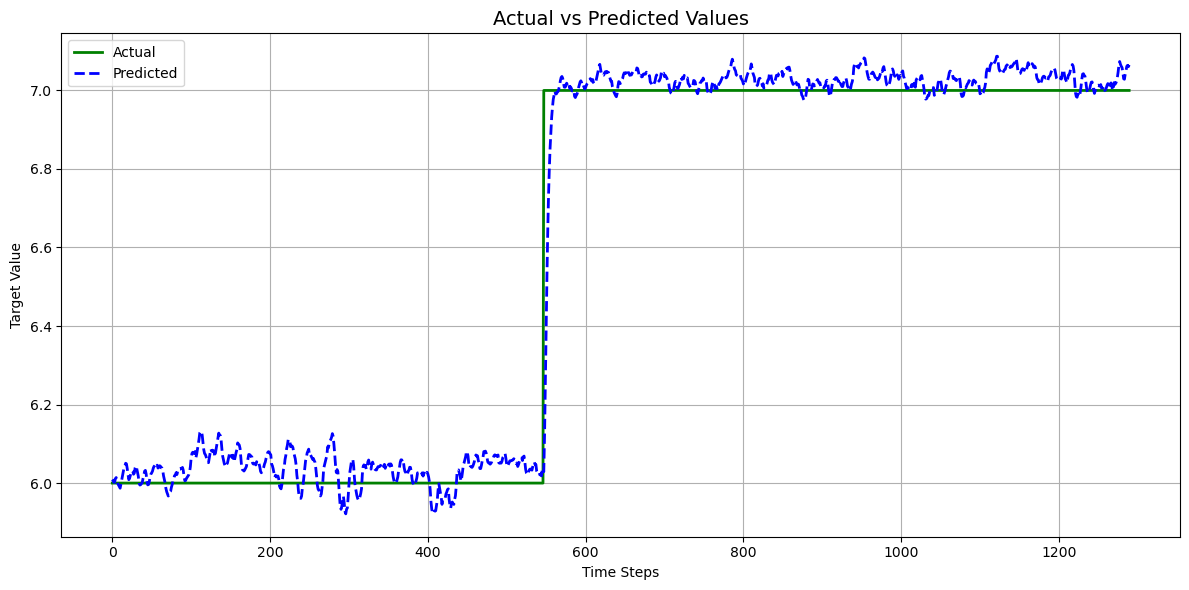

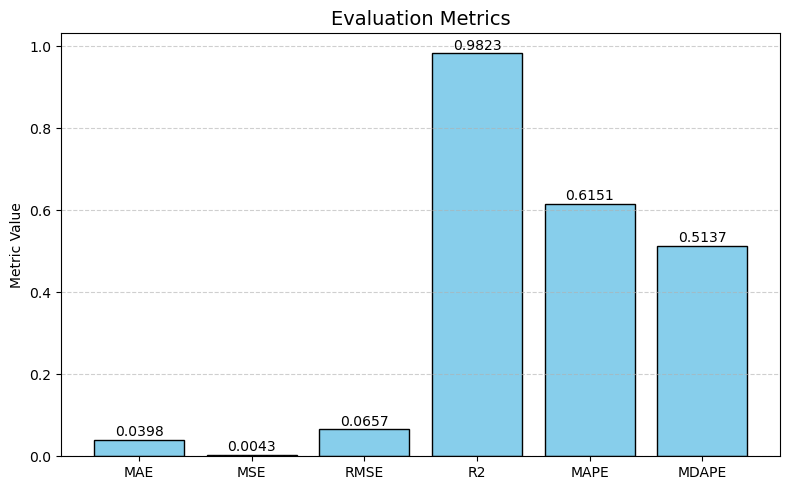

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 📁 Directory where outputs were saved
MAIN_DIR = r'C:\Users\Hp\Desktop\open ended lab\New folder'

# ===============================
# 📊 Plot 1: Actual vs Predicted
# ===============================
# Load predictions
pred_df = pd.read_csv(os.path.join(MAIN_DIR, 'predictions.csv'))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(pred_df['Actual'], label='Actual', color='green', linewidth=2)
plt.plot(pred_df['Predicted'], label='Predicted', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Time Steps')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# 📊 Plot 2: Evaluation Metrics
# ===============================
# Load metrics
metrics_df = pd.read_csv(os.path.join(MAIN_DIR, 'metrics.csv'))

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_df['Metric'], metrics_df['Value'], color='skyblue', edgecolor='black')
plt.title('Evaluation Metrics', fontsize=14)
plt.ylabel('Metric Value')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.002, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
